# Artificial Neural Networks for Regression

## Introduction

The goal of this study case is to implement an Artificial Neural Network (ANN) Regression model using tensorflow and python to predict the electrical energy output of a Combined Cycle Power Plant.

In [3]:
from IPython.core.display import Image
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
#check the tensorflow version that we are using
tf.__version__

'2.1.0'

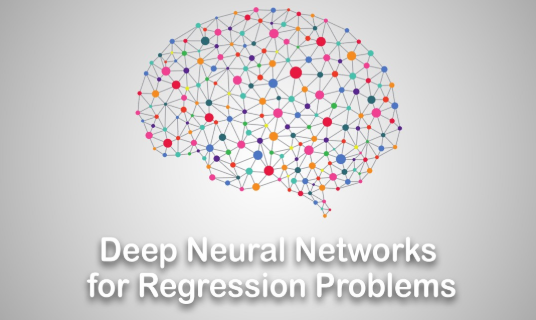

In [4]:
Image("BRAIN_REGRESSION.PNG")

## Part 1 - Data Preprocessing

### 1.1 Importing the dataset

let’s load the dataset and visualize the information.

In [5]:
#loading the dataset
dataset = pd.read_excel('Folds5x2_pp.xlsx')
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


__Description of the variables of the dataset:__

* AT: Temperature
* V: Pressure
* AP: Humidity
* RH: Vacuum
* PE: Electrical Energy =>> the output value


In [6]:
#check the datatype of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


Comments => We see that we do not have any null value and categorical data in our dataset.

In [7]:
#get de independent variables and dependent variable
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [8]:
print(X)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [9]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


### 1.2 Splitting the dataset into the Training set and Test set

In [10]:
#getting the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

__Important Note =>> It is not necessary to apply Feature Scaling for regression models!__

## Part 2 - Building the ANN

### 2.1 Initializing the ANN

Before building the ANN, let’s check its architecture in order to understand the calculations and logic behind the code.

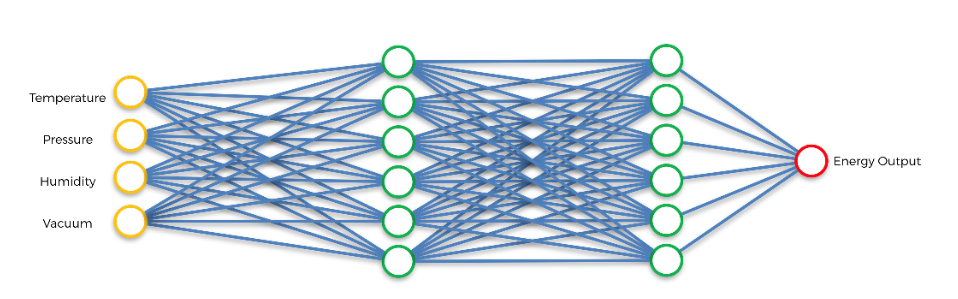

In [13]:
Image("ANN_Architecture.png")

We can identify the input layer (the line composed of yellow neurons), which contains the independent variables (temperature, pressure, humidity and vacuum). Then, we have the first hidden layer with 6 hidden neurons and the second hidden layer with 6 hidden neurons as well. Finally, we have the output layer, which contains only one output neuron because we have just to predict one real value (the energy output).

Let’s initialize (activate) the ANN as a sequence of layers. To do it, we have to create an object of the sequential class, which allows us to build the ANN. The sequential class comes from the Keras module of TensorFlow 2.

The ANN is actually a sequence of layers, which starts from the input layer and then we have hidden layers fully connected until the output layer.

In [12]:
#create the object for the ANN
ann = tf.keras.models.Sequential()

### 2.2 Adding the input layer and the first hidden layer

The way to add a fully connected layer into an ANN at whatever phase you are is using the “dense class”. So, we have to take our object and call the “add” method of the sequential class. The layers will be created as objects of a new class, which is the “dense class”. Regarding the hidden layer, we will choose the default option of 6 hidden neurons. 

__Important:__ We do not have to enter the number of features that we want for the input layer because the features will be recognized automatically by tensorflow. So, once we included the matrix of features in the training, the ANN will automatically collect these four features. Therefore, we do not need to specify that we have 4 features.

On another hand, we will use the “rectifier” function for the activation function parameter, which will break the linearity of the operations happening between this input layer and the first hidden layer.

In [14]:
#add a simple connected layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### 2.3 Adding the second hidden layer

For the second hidden layer, we will use the same code as the first hidden layer.

In [ ]:
#add the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In case that we have more hidden layers, we have to do the same. Just specify in the units argument how many hidden neurons we  want to have in thisnew hidden layer. Then, the new hidden layer that you are adding is connected automatically to the previous one added before you know the first hidden layer.

### 2.4 Adding the output layer

We want an output layer fully connected to that second hidden layer and we need to use the “dense class” again, but we need to change some parameters to build the output layer. We will include only one output neuron here because we want to predict a continuous real number as a final output.

Regarding the activation function, for regression we keep the output layer without any activation function.

In [15]:
#add the output layer
ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### 3.1 Compiling the ANN

Now, let’s connect the ANN with the optimizer and the loos function. In order to do it, we will use the “compile” method to compile the ANN. Here we have to include two main parameters:

* __Optimizer__ =>> Choose an optimizer to adjust the weights through stochastic gradient descent and reduce the loss function in the next iteraction. We will select the “adam” option, which is the most used in stochastic gradient descent..
* __Loss function__ =>> It computes the difference between the predictions and the real result. For regression, we can choose “mean squared error” or “root mean squared error”.



In [17]:
#compiling the ANN
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

### 3.2 Training the ANN model on the Training set 

Let’s use the fit method in the training sets to train our ANN.

Here we need to specify the options for two main parameters:

* __Batch size__ =>> Instead of propagating all the features one by one, we propagate them in batches of a certain number of elements of a certain sets of the features. By default, we can use the 32 in the batch size.

* __Epochs__ =>> Forward-propagation and Backward-propagation happens over many epochs and over each epoch the loss functions is slightly reduced. Therefore, we want to repeat these epochs in order to reduce more little by little the loss function. By default, we can use 100 epochs. 


In [18]:
#training the ANN
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Train on 7654 samples
Epoch 1/100
7654/7654 [==============================] - 1s 118us/sample - loss: 5752.9360
Epoch 2/100
7654/7654 [==============================] - 0s 36us/sample - loss: 261.9719
Epoch 3/100
7654/7654 [==============================] - 0s 44us/sample - loss: 247.6824
Epoch 4/100
7654/7654 [==============================] - 0s 57us/sample - loss: 230.4209
Epoch 5/100
7654/7654 [==============================] - 0s 42us/sample - loss: 210.9364
Epoch 6/100
7654/7654 [==============================] - 0s 38us/sample - loss: 189.9985
Epoch 7/100
7654/7654 [==============================] - 0s 51us/sample - loss: 168.3451
Epoch 8/100
7654/7654 [==============================] - 0s 42us/sample - loss: 147.1466
Epoch 9/100
7654/7654 [==============================] - 0s 40us/sample - loss: 126.7308
Epoch 10/100
7654/7654 [==============================] - 0s 38us/sample - loss: 107.3899
Epoch 11/100
7654/7654 [==============================] - 0s 36us/sample - loss: 90.0

Comments: We can see that the loss is reduced as we continue running all the epochs.

### 3.3 Predicting the results of the Test set

We have to use the “predict” method in the test set. Then, we will get all these predictions of the test in a new vector, which is called the y_pred. Finally, we can compare the y_pred with the real results (y_test).

In [19]:
#predict the test results of the test set
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[429.3  431.23]
 [460.33 460.01]
 [463.84 461.14]
 ...
 [471.06 473.26]
 [437.89 438.  ]
 [457.09 463.28]]


Comments: We observe that the predictions are quite close to the real results.